### Sales Analysis

In [1]:
import pandas as pd
import os

##### Merge the 12months of sales data into a single csv file

In [2]:
files=[file for file in os.listdir('./sales_data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./sales_data/'+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv('all_data.csv',index=False)

In [3]:
all_data=pd.read_csv('all_data.csv')
all_data.drop(1,axis=0,inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Dropping all the rows with NaN values

In [4]:
all_data=all_data.dropna(how='all')
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Adding the month column

In [5]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Best month in terms of Sales

In [10]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
results=all_data.groupby('month').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


##### Plotting the above result

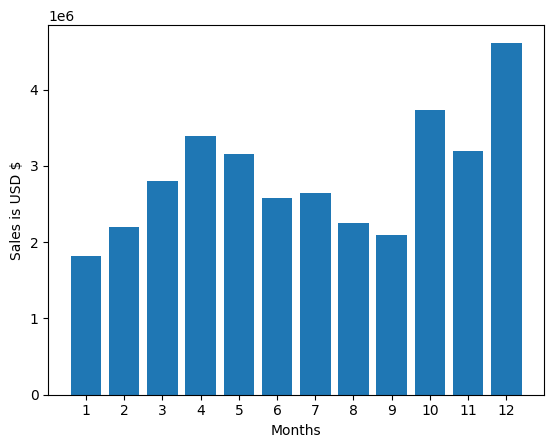

In [11]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales is USD $')
plt.show()

##### What city had the highest number of sales?

In [26]:
#Using the apply() method
def getcity(address):
    return address.split(',')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x: getcity(x))
res=all_data.groupby('City').sum(numeric_only=True)

##### Plotting the above result

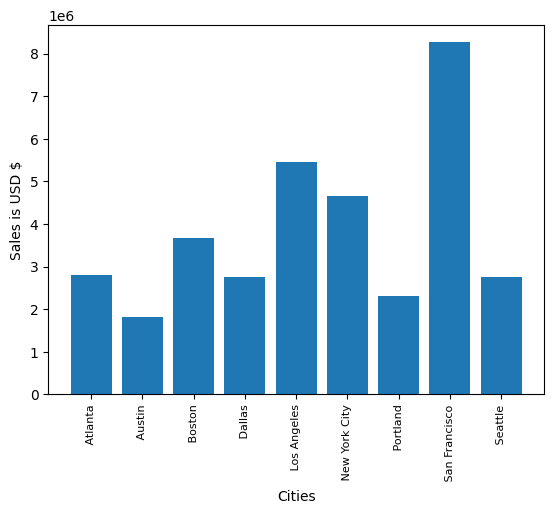

In [27]:
import matplotlib.pyplot as plt
cities = [city for city,df in all_data.groupby('City')]

plt.bar(cities,res['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('Cities')
plt.ylabel('Sales is USD $')
plt.show()

##### What time should we display the ads to maximize the likelihood of the customers buying product?

In [31]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minutes']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


##### Plotting the result

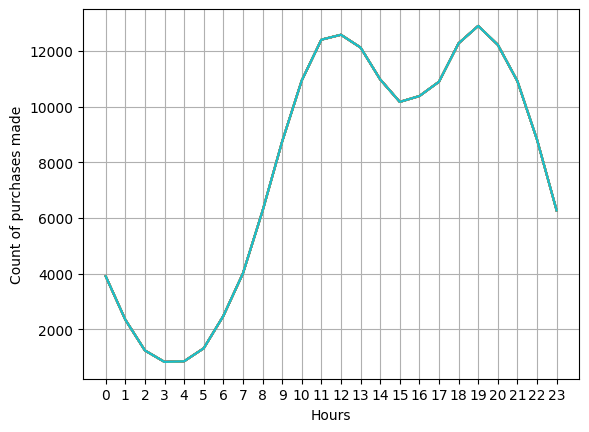

In [36]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Count of purchases made')
plt.grid()
plt.show()

#Around 11AM(11) or 7PM(19)

##### What products are most often sold together?

In [42]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(20)

C:\Users\Subhrojyoti Neogi\AppData\Local\Temp\ipykernel_21180\1065243865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [48]:
from itertools import combinations 
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for k,v in count.most_common(10):
    print(k,v)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Reference:https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

##### What product sold the most?

In [60]:
pr_grp=all_data.groupby(['Product'])
sum_pr=pr_grp.sum()['Quantity Ordered']
sum_pr.head()

C:\Users\Subhrojyoti Neogi\AppData\Local\Temp\ipykernel_21180\3649022022.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_pr=pr_grp.sum()['Quantity Ordered']


Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

##### Plotting

C:\Users\Subhrojyoti Neogi\AppData\Local\Temp\ipykernel_21180\4174950917.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  products=[product for product,df in pr_grp]


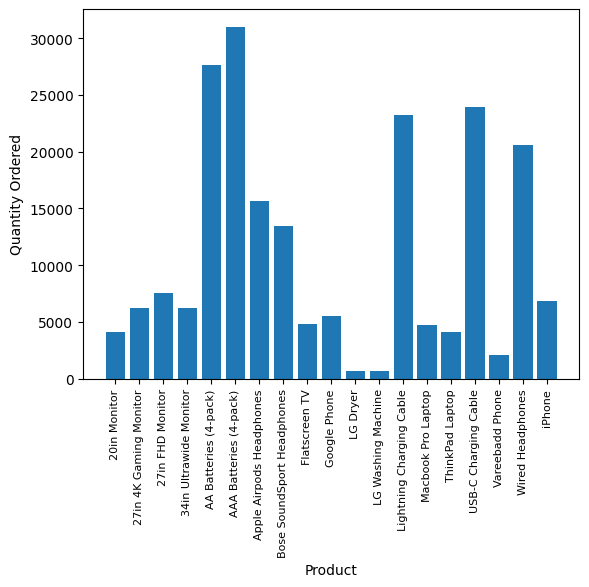

In [63]:
products=[product for product,df in pr_grp]
plt.bar(products,sum_pr)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [67]:
prices=all_data.groupby(['Product']).mean(numeric_only=False)['Price Each']
prices.head()

C:\Users\Subhrojyoti Neogi\AppData\Local\Temp\ipykernel_21180\983850057.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  prices=all_data.groupby(['Product']).mean(numeric_only=False)['Price Each']


Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

##### Overlaying a second y-axis on existing chart

C:\Users\Subhrojyoti Neogi\AppData\Local\Temp\ipykernel_21180\592592098.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


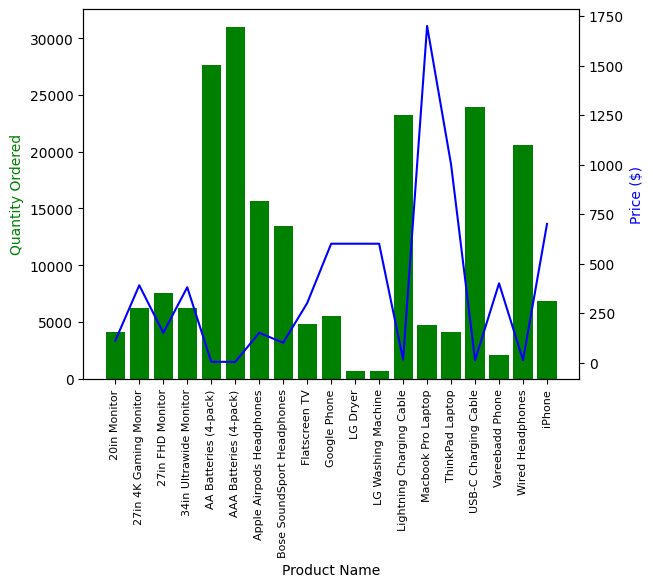

In [76]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(products,sum_pr,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xticklabels(products,rotation='vertical',size=8)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
plt.show()